# PROJECT
## Applications of Big Data

### 0. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data processing

#### 1.0. Data loading

In [2]:
df = pd.read_csv('dataset/job_descriptions.csv')
df.shape

(1615940, 23)

In [3]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

In [4]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


**Job Dataset**: là dữ liệu ghi nhận các nhu cầu tuyển dụng của thị trường việc làm, được tạo ra từ thư viện Python Faker. Bộ dữ liệu cung cấp một bộ sưu tập toàn diện các thông tin tuyển dụng tổng hợp để tạo điều kiện thuận lợi trong việc nghiên cứu và phân tích trong lĩnh vực xu hướng thị trường việc làm, học máy. 

- Mỗi dòng của dữ liệu ghi lại đầy đủ các thông tin của 1 yêu cầu tuyển dụng bao gồm: 
    - `Job Id`: mã số công việc
    - `Job Title`: tên công việc
    - `Company`: tên công ty
    - `Job Title`: loại công việc
    - `Salary Range`: mức lương
    - `location`: địa điểm
    - `Skills`: Các kỹ năng hoặc yêu cầu cụ thể cho công việc.
    - Và những cột khác nó đã được mô tả ở `Data_description.txt`

#### 1.1. Data Type

In [5]:
def open_object_dtype(s):
    dtypes = set(s.apply(lambda item : type(item)))
    return dtypes

df.apply(open_object_dtype)

Job Id                               {<class 'int'>}
Experience                           {<class 'str'>}
Qualifications                       {<class 'str'>}
Salary Range                         {<class 'str'>}
location                             {<class 'str'>}
Country                              {<class 'str'>}
latitude                           {<class 'float'>}
longitude                          {<class 'float'>}
Work Type                            {<class 'str'>}
Company Size                         {<class 'int'>}
Job Posting Date                     {<class 'str'>}
Preference                           {<class 'str'>}
Contact Person                       {<class 'str'>}
Contact                              {<class 'str'>}
Job Title                            {<class 'str'>}
Role                                 {<class 'str'>}
Job Portal                           {<class 'str'>}
Job Description                      {<class 'str'>}
Benefits                             {<class '

Quan sát các cột dữ liệu nhóm có nhận xét như sau:

- Có các cột dữ liệu cần được chuyển đổi kiểu dữ liệu:
    - `Salary Range`: chuyển sang kiểu `float` và lấy giá trị trung bình.
    - `Experience`: chuyển sang kiểu `int` và lấy giá trị trung bình.
    - `Job Posting Date`: chuyển sang kiểu `datetime` và có thể thêm các cột `Date`, `Month`, `Year` để phân tích.


#### 1.2. Duplicated

In [6]:
df.duplicated().sum()

0

Qua kiểm tra thì dữ liệu này không bị trùng lặp.

#### 1.3. Missing values

In [7]:
df.isnull().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

Dữ liệu bị thiếu `5478` giá trị ở cột `Company Profile`: 
- Có thể là do công ty không cung cấp thông tin về hồ sơ đăng ký của công ty.
- Có thể là nhập không đúng cách hoặc bị lỗi trong quá trình thu thập dữ liệu.

Tạm thời nhóm sẽ chưa xử lý vấn đề này vì nó không ảnh hưởng nhiều đến kết qủa.

#### 1.4. Outliers và Data Quality

Chuyển đổi dữ liệu của các cột, thêm các cột mới và loại bỏ các cột không cần thiết.

In [8]:
df['Salary_avg'] = df['Salary Range'].str.replace('[$K]', '', regex=True) \
                                    .str.split('-', expand=True) \
                                    .astype(float) \
                                    .mean(axis=1)

In [9]:
df['Experience_avg'] = df['Experience'].str.replace(' Years', '') \
                                      .str.split(' to ', expand=True) \
                                      .astype(float) \
                                      .mean(axis=1)

In [10]:
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'])

In [11]:
df['Day'] = df['Job Posting Date'].dt.day
df['Month'] = df['Job Posting Date'].dt.month
df['Year'] = df['Job Posting Date'].dt.year

In [12]:
df.dtypes

Job Id                       int64
Experience                  object
Qualifications              object
Salary Range                object
location                    object
Country                     object
latitude                   float64
longitude                  float64
Work Type                   object
Company Size                 int64
Job Posting Date    datetime64[ns]
Preference                  object
Contact Person              object
Contact                     object
Job Title                   object
Role                        object
Job Portal                  object
Job Description             object
Benefits                    object
skills                      object
Responsibilities            object
Company                     object
Company Profile             object
Salary_avg                 float64
Experience_avg             float64
Day                          int64
Month                        int64
Year                         int64
dtype: object

Qua quan sát có 1 số cột dữ liệu không cần thiết trong quá trình phân tích như sau: `latitude`, `longitude`, `Experience`, `Salary Range`, `Company Profile`, `Contact Person` và `Contact`. Tuy nhiên nhóm vẫn sẽ giữ lại là lưu nó ở một dataframe khác để có thể sử dụng lại nếu cần thiết khi xây dựng mô hình.

In [13]:
df1 = df.drop(['Salary Range', 'Experience', 'latitude', 'longitude', 'Company Profile', 'Contact Person', 'Contact'], axis=1)

In [14]:
df2 = df.drop(df1.columns, axis=1)

##### 1.4.1. Các cột numerical

In [15]:
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Job Id', 'Company Size', 'Salary_avg', 'Experience_avg', 'Day',
       'Month', 'Year'],
      dtype='object')

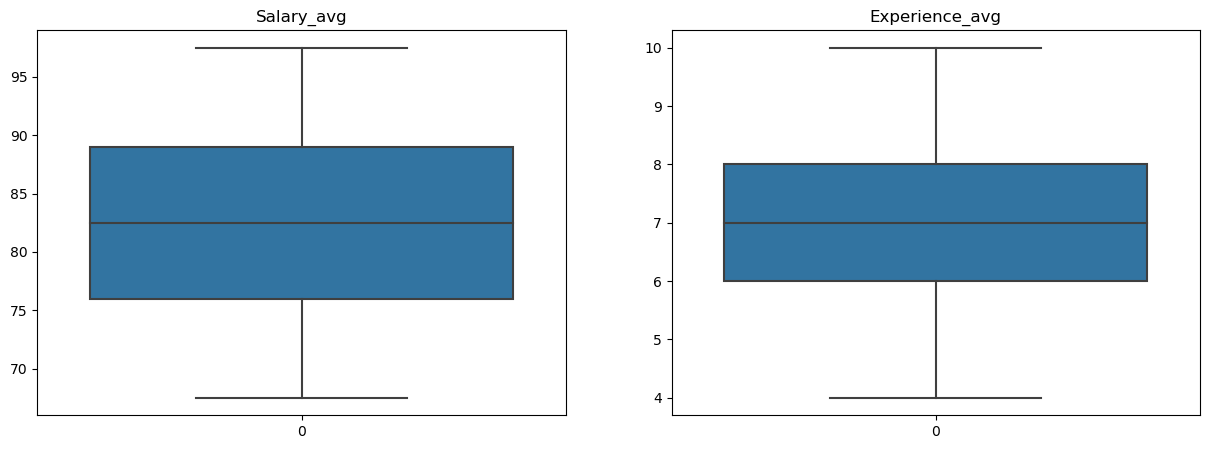

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(df1['Salary_avg'], ax=ax[0])
ax[0].set_title('Salary_avg')

sns.boxplot(df1['Experience_avg'], ax=ax[1])
ax[1].set_title('Experience_avg')

plt.show();

Các cột numerical không có outliers và có thể sử dụng trực tiếp trong quá trình phân tích.

**Câu lệnh bên dưới chỉ thực hiện một lần duy nhất trên máy một thành viên duy nhất. Sau khi thực hiện, tiến hành lưu trữ df thành file csv, các thành viên khác chỉ cần load file này vào là được, không cần chạy lại câu lệnh `to_csv` để tránh mất thời gian.**

In [25]:
df1.to_csv('dataset/data_clean.csv', index=False)
df2.to_csv('dataset/data_clean_other.csv', index=False)